# 第十一章 有监督机器学习

# 目录

&nbsp; **[11.1 数据挖掘与知识发现](#11.1-数据挖掘与知识发现)**

&nbsp; **[11.2 分类问题试水：朴素贝叶斯和最近邻算法](#11.2-分类问题试水：朴素贝叶斯和最近邻算法)**

&nbsp; &nbsp; [11.2.1 朴素贝叶斯](#11.2.1-朴素贝叶斯)

&nbsp; &nbsp; [11.2.2 最近邻算法](#11.2.2-最近邻算法)

&nbsp; **[11.3 决策树和其属性选择](#11.3-决策树和其属性选择)**

&nbsp; &nbsp; [11.3.1 使用熵进行属性选择](#11.3.1-使用熵进行属性选择)

&nbsp; &nbsp; [11.3.2 使用频率表进行属性选择](#11.3.2-使用频率表进行属性选择)

&nbsp; &nbsp; [11.3.3 避免决策树的过度拟合](#11.3.3-避免决策树的过度拟合)

[1] 毛国君和段立娟. _数据挖掘原理与算法_. 清华大学出版社. 第3版<br>
[2] 麦克斯·布拉德. _数据挖掘原理_. 清华大学出版社. 第4版<br>
[3] 李航. _统计学习方法_. 清华大学出版社. 第2版<br>
[4] 张瑾和翁张文. _Python商业数据分析_. 中国人民大学出版社<br>
[5] 机器学习

## 11.1 数据挖掘与知识发现

<p>数据挖掘是一个多学科交叉研究领域，它融合了数据库技术、人工智能、机器学习、统计学、知识工程、面向对象方法、信息检索、高性能计算以及数据可视化等最新技术的研究成果。经过十几年的研究，产生了许多新概念和新方法。特别是最近几年，一些基本概念和方法趋于清晰，它的研究正向着更深入的方向发展。</p>

<p>数据挖掘之所以被称为未来信息处理的骨干技术之一，主要在于它以一种全新的概念改变着人类利用数据的方式。20世纪，数据库技术取得了决定性的成果并且已经得到广泛的应用。但是，数据库技术作为一种基本的信息存储和管理方式，仍然以联机事务处理（On-Line Transaction Processing,OLTP）为核心应用，缺少对决策、分析、预测等高级功能的支持机制。众所周知，随着数据库容量的膨胀，特别是数据仓库以及Web等新型数据源的日益普及，联机分析处理（On-Line Analytic Processing, OLAP）、决策支持（Decision Support）以及分类（Classification）、聚类（Clustering）等复杂应用成为必然。面对这一挑战， 数据挖掘和知识发现（Knowledge Discovery）技术应运而生，并显示出强大的生命力。数据挖掘和知识发现使数据处理技术进入了一个更高级的阶段。它不仅能对过去的数据进行查询，并且能够找出过去数据之间的潜在联系，进行更高层次的分析，以便更好地做出理想的决策、预测未来的发展趋势等。通过数据挖掘，有价值的知识、规则或高层次的信息就能从数据库的相关数据集合中抽取出来，从而使大型数据库作为一个丰富、可靠的资源为知识的提取服务。</p>

<p>特别需要指出的是，数据挖掘技术从一开始就是面向应用的。它不仅仅是面向特定数据库的简单检索查询应用，而是要对这些数据进行微观、中观乃至宏观的统计、分析、综合和推理，进而发现潜在的知识。这里所说的知识发现，不是要求发现放之四海而皆准的真理，也不是要去发现崭新的自然科学定理和纯数学公式。所有发现的知识都是相对的，是面向特定领域的，同时还要能够易于被用户理解。</p>

<font color='red'>来自[1]数据挖掘原理与算法<font>

**数据挖掘与机器学习的联系**

数据挖掘领域在二十世纪九十年代形成，它受到很多学科领域的影响，其中数据库、机器学习、统计学无疑影响最大。 数据挖掘是从海量数据中发掘知识，这就必然涉及对"海量数据"的管理和分析.大体来说，数据库领域的研究为数据挖掘提供数据管理技术，而机器学习和统计学的研究为数据挖掘提供数据分析技术。由于统计学界的研究成果通常需要经由机器学习研究来形成有效的学习算法，之后再进入数据挖掘领域，因此从这个意义上说，统计学主要是通过机器学习对数据挖掘发挥影响，而机器学习领域和数据库领域则是数据挖掘的两大支撑。

今天，机器学习己经与普通人的生活密切相关.例如在天气预报、能源勘探、环境监测等方面，有效地利用机器学习技术对卫星和传感器发国的数据进行分析，是提高预报和检测准确性的重要途径;在商业营销中，有效地利用机器学习技术对销售数据、客户信息进行分析，不仅可帮助商家优化库存降低成本，还有助于针对用户群设计特殊营销策略；……下面再举几例；

众所周知，谷歌、百度等互联网搜索引擎己开始改变人类的生活方式，例如很多人已习惯于在出行前通过互联网搜索来了解目的地信息、寻找合适的酒店、餐馆等.美国《新闻周刊》曾对谷歌有一句话评论"它使任何人离任何问题的答案间的距离变得只有点击一下鼠标这么远"显然，互联网搜索是通过分析网络上的数据来找到用户所需的信息，在这个过程中，用户查询是输入、搜索结果是输出，而要建立输入与输出之间的联系，内核必然需要机器学习技术。事实上，互联网搜索发展至今，机器学习技术的支撑居功至伟.到了今天，搜索的对象、内容日趋复杂，机器学习技术的影响更为明显，例如在进行"图片搜索"时，无论谷歌还是百度都在使用最新潮的机器学习技术。谷歌、百度、脸书、雅虎等公司纷纷成立专攻机器学习技术的研究团队，甚至直接以机器学习技术命名的研究院，充分体现出机器学习技术的发展和应用，甚至在一定程度上影响了互联网产业的走向。

<font color='red'>来自[5]机器学习</font>

#### （1）数据挖掘（Data Mining）

**数据挖掘技术的商业需求分析**

* 随着信息技术的高速发展，数据库应用的规模、范围和深度不断扩大，网络环境成为主流等等。产生“数据丰富而信息贫乏（Data Rich & Information Poor）”现象。

* 在强大的商业需求的驱动下，商家们开始注意到有效地解决大容量数据的利用问题具有巨大的商机；学者们开始思考如何从大容量数据集中获取有用信息和知识的方法。
* 数据（Data）、信息（Information）和知识（Knowledge）是广义数据表现的不同形式。

**概念**：
<p>数据挖掘的概念包含丰富的内涵，是一个多学科交叉研究领域。</p>
<p>从商业角度看， 数据挖掘从本质上说是一种新的商业信息处理技术。数据挖掘技术把人们对数据的应用，从低层次的联机查询操作，提高到决策支持、分析预测等更高级应用上。它通过对这些数据进行微观、中观乃至宏观的统计、分析、综合和推理，发现数据间的关联性、未来趋势以及一般性的概括知识等，这些知识性的信息可以用来指导高级商务活动。

从决策、分析和预测等高级商业目的来看，原始数据只是未被开采的矿山，需要挖掘和提炼才能获得对商业目的有用的规律性知识。这正是数据挖掘这个名字的由来。所以，数据挖掘就是按企业的既定业务目标，对大量的企业数据进行深层次分析以揭示隐藏的、未知的规律性并将其模型化，从而支持商业决策活动。从商业应用角度刻画数据挖掘，可以使我们更全面地了解数据挖掘的真正含义。它有别于机器学习等其他研究领域，从它的提出之日起就具有很强的商业应用目的。同时，数据挖掘技术只有面向特定的商业领域才有应用价值。数据挖掘并不是要求发现放之四海而皆准的真理，所有发现的知识都是相对的，并且对特定的商业行为才有指导意义。</p>

<font color='red'>来自[1]数据挖掘原理与算法<font>

**数据挖掘流程**
![数据挖掘流程.png](数据挖掘流程.png)
<center>图11.1-1 数据挖掘流程</center>

**数据挖掘应用**

数据挖掘的应用范围越来越广，涉及多个领域：
* 分析卫星图像
* 分析有机化合物
* 自动文摘
* 信用卡欺诈检测
* 电力负荷预测
* 财务预测
* 医疗诊断
* 预测电视观众的比例
* 产品设计
* 房地产估价
* 针对性营销
* 信息检索和文本总结
* 火力发电厂优化
* 毒性危害分析
* 天气预报

此外，还有其他许多应用。潜在或实际的应用示例包括：
* 超市连锁店挖掘客户交易数据，以更快找到高价值客户。
* 信用卡公司可使用客户交易数据仓库进行诈骗检测。
* 大型连锁酒店可使用调查数据库来识别“高价值”客户的特性。
* 通过提高预测不良贷款的能力来预测消费者贷款申请的违约概率。
* 减少VLSI芯片的制造缺陷。
* 筛选在半导体制造过程中收集的大量数据，以识别导致问题的条件。
* 预测电视节目的收视率，从而允许管理人员合理安排节目时间，尽量提高收视率并增加广告收入。
* 预测癌症患者对化疗的反应，从而降低医疗费用而不影响护理质量°
* 分析老年人的“动作捕捉”数据。
* 社交网络中的趋势挖掘和可视化。

应用可分为四个主要类型：分类、数值预测、关联规则和聚类。

<font color='red'>来自PPT、[2]数据挖掘原理<font>

#### （2）知识发现（Knowledge Discovery）

**概念：**从数据中提取隐含的、先前未知的、潜在可用的信息。

<p>数据库中的知识发现（Knowledge Discovery in Databases, KDD）是比数据挖掘出现更早的一个名词。1989年8月在美国底特律召开的第十一届国际人丁智能联合会议的专题讨论会上首次出现KDD这个术语。随后在1991年.1993年和1994年都举行KDD专题讨论会，汇集来自各个领域的研究人员和应用开发者，集中讨论数据统计、海量数据分析算法、知识表示、知识运用等问题。随着参与人员的不断增多，从1995年开始，KDD国际会议发展成为年会。1998年在美国纽约举行的第四届知识发现与数据挖掘国际学术会议不仅进行了学术讨论，并且有30多家软件公司展示了他们的数据挖掘软件产品。1999年在美国圣地亚哥举行的第五届KDD国际学术大会，参加人数近千人，投稿280多篇。近年来的国际会议涉及的范围更广，如数据挖掘与知识发现（Data Mining and Knowledge Discovery, DMKD）的基础理论、新的发现算法、数据挖掘与数据仓库及OLAP的结合、可视化技术、知识表示方法、Web中的数据挖掘等。此外，IEEE、ACM、IFIS、VLDE、SIGMOD等其他学会、学刊也纷纷把DMKD列为会议议题或出版专刊，成为当前国际上的一个研究热点。</p>

<font color='red'>来自[1]数据挖掘原理与算法、[2]数据挖掘原理<font>

#### （3）数据挖掘和知识发现的联系
<p>关于知识发现与数据挖掘的关系，有许多不同的看法。我们可以从这些不同的观点中了解数据挖掘的技术含义。</p>

* **将KDD看作数据挖掘的一个特例：**既然数据挖掘系统可以在关系型数据库、事务数据库、数据仓库、空间数据库（Spatial Database）、文本数据（Text Data）以及诸如Web等多种数据组织形式中挖掘知识，那么数据库中的知识发现只是数据挖掘的一个方面。从这个意义上说，数据挖掘就是从数据库、数据仓库以及其他数据存储方式中挖掘有用知识的过程。这是早期比较流行的观点，这种描述强调了数据挖掘在源数据形式上的多样性。


* **将数据挖掘看作KDD过程的一个步骤：**这种观点得到大多数学者认同，有它的合理性。虽然我们可以从数据仓库、Web等源数据中挖掘知识，但是这些数据源都是和数据库技术相关的。数据仓库是由源数据库集成而来的，即使是像Web这样的数据源恐怕也离不开数据库技术来组织和存储抽取的信息。因此KDD是一个更广义的范畴，它包括数据清洗、数据集成、数据选择、数据转换、数据挖掘、模式生成及评估等一系列步骤。这样，我们可以把KDD看作是一些基本功能构件的系统化协同工作系统，而数据挖掘则是这个系统中的一个关键的部分。源数据经过清洗和转换等成为适合于挖掘的数据集，数据挖掘在这种具有固定形式的数据集上完成知识的提炼，最后以合适的知识模式用于进一步分析决策工作。在1996年出版的权威论文集《知识发现与数据进展》中，Fayyd、Piatetsky-Shapiro和Smyth给出了KDD和数据挖掘的最新定义，将二者加以区分：
    * KDD是从数据中辨别有效的、新颖的、潜在有用的、最终可理解的模式的过程；
    * 数据挖掘是KDD中通过特定的算法在可接受的计算效率限制内生成特定模式的一个步骤。
  

* **KDD与数据挖掘含义相同：**有些人认为，KDD与Data Mining只是叫法不一样，它们的含义基本相同。事实上，在现今的文献中，许多场合，如技术综述等，这两个术语仍然不加区分地使用着。有人说，KDD在人工智能界更流行，而Data Mining在数据库界使用更多。也有人说，一般在研究领域被称作KDD,在工程领域则称为数据挖掘。

<font color='red'>来自[1]数据挖掘原理与算法<font>

<p>所以，数据挖掘定义有广义和狭义之分。从广义的观点，数据挖掘是从大型数据集（可能是不完全的、有噪声的、不确定性的、各种存储形式的）中，挖掘隐含在其中的、人们事先不知道的、对决策有用的知识的完整过程。从狭义的观点上出发，我们可以定义数据挖掘是从特定形式的数据集中提炼知识的过程。

从上面的描述中可以看出，数据挖掘概念可以在不同的技术层面上来理解，但是其核心仍然是从数据中挖掘知识。所以，有人说叫知识挖掘更合适。本书也在不同的章节使用数据挖掘的广义和狭义概念，读者要注意根据上下文加以区分。当然，在可能混淆的地方，我们将明确说明。</p>

<font color='red'>来自[1]数据挖掘原理与算法<font>

## 11.2 分类问题试水：朴素贝叶斯和最近邻算法

<p>分类是数据挖掘最常见的应用之一，对应于日常生活中经常发生的任务。例如，医院可能希望将患者患某种疾病的风险分类为高、中或低三个类别，民意调查公司可能希望将受访者分类为可能投票给某个政党的人或尚未决定的人，或者希望将学生成绩分类为优秀、良好、合格或不合格。</p>
<p>分类是日常生活中经常发生的任务。从本质上讲，主要是划分对象，以便将每个 对象分配给具有互斥性的类别。术语“互斥性”意味着每个对象必须被精确地分配给 一个类别，既不能分配给多个类别，也不能不分配。</p>

许多实际决策任务可被表述为分类问题,即将人或对象分配给多个类别中的一个, 例如：

* 可能在超市购买或不购买特定产品的客户；
* 患有某种疾病的高、中或低风险的人；
* 需要区分的学生成绩，比如及格或不及格；
* 雷达显示器上显示的物体，对应于车辆、人、建筑物或树木；
* 与犯罪者非常相似、略有相似或不相似的人；
* 房屋价值可能上涨、下跌或在12个月内价值不变；
* 未来12个月内发生车祸的高、中、低风险人群；
* 可能为多个政党（或不为任何政党）投票的人；
* 预报第二天下雨的可能性（非常可能、很可能、不太可能、非常不可能）。

<font color='red'>来自[2]数据挖掘原理、[1]数据挖掘原理与算法<font>

In [1]:
import pandas as pd

# “满意度”数据导入
data = pd.read_excel('商务与经济统计数据-V2.xlsx',sheet_name='满意度').iloc[:,1:]    # 读取数据
data

,店铺评级,商品销量,售后服务评分,质保年限,是否折扣,是否包邮,商品质量,客服服务,满意度
0,5,9536,5,2,0,1,中,3,一般
1,2,711,1,10,0,0,优,5,不满意
2,3,4719,3,5,0,0,中,1,满意
3,1,6969,1,3,1,1,良,3,满意
4,3,4333,1,10,0,0,中,4,不满意
...,...,...,...,...,...,...,...,...,...
995,4,4841,3,3,0,1,劣,4,一般
996,5,3281,4,10,1,0,中,5,一般
997,1,9009,1,2,0,1,中,5,非常不满意
998,3,5389,1,1,0,0,良,2,非常满意


In [2]:
df = pd.concat((data[data.满意度.values=='非常满意'],data[data.满意度.values=='非常不满意']),axis=0)
df

,店铺评级,商品销量,售后服务评分,质保年限,是否折扣,是否包邮,商品质量,客服服务,满意度
8,1,2639,1,5,0,1,良,1,非常满意
17,3,7840,4,5,1,0,良,1,非常满意
22,4,6287,2,1,0,0,中,5,非常满意
34,5,8662,4,4,1,0,中,4,非常满意
37,1,979,2,2,0,0,优,4,非常满意
...,...,...,...,...,...,...,...,...,...
971,2,5512,1,3,0,1,良,5,非常不满意
980,4,868,4,5,1,0,良,4,非常不满意
992,2,6478,2,2,0,0,劣,4,非常不满意
993,4,4929,2,4,0,1,中,3,非常不满意


In [3]:
from sklearn.preprocessing import LabelEncoder    # Label编码

encoder=LabelEncoder()
df['满意度']=encoder.fit_transform(df['满意度'])

In [4]:
dummy_feature = df.iloc[:,6]
df = df.drop(columns = '商品质量')

dummies = pd.get_dummies(dummy_feature)[['中','良','优']]   # 哑变量
df = pd.concat((dummies,df),axis=1)
df

,中,良,优,店铺评级,商品销量,售后服务评分,质保年限,是否折扣,是否包邮,客服服务,满意度
8,0,1,0,1,2639,1,5,0,1,1,1
17,0,1,0,3,7840,4,5,1,0,1,1
22,1,0,0,4,6287,2,1,0,0,5,1
34,1,0,0,5,8662,4,4,1,0,4,1
37,0,0,1,1,979,2,2,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
971,0,1,0,2,5512,1,3,0,1,5,0
980,0,1,0,4,868,4,5,1,0,4,0
992,0,0,0,2,6478,2,2,0,0,4,0
993,1,0,0,4,4929,2,4,0,1,3,0


In [5]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3)    # 划分测试集

### 11.2.1 朴素贝叶斯

<p>朴素贝叶斯（naïve Bayes）法是基于贝叶斯定理与特征条件独立假设的分类方法。对于给定的训练数据集，首先基于特征条件独立假设学习输入输出的联合概率分布；然后基于此模型，对给定的输入$x$，利用贝叶斯定理求出后验概率最大的输出$y$。朴素贝叶斯法实现简单，学习与预测的效率都很高，是一种常用的方法。</p>

<font color='red'>来自[3]统计学习方法<font>

#### （1）贝叶斯定理

设$X$是类标号未知的数据样本。设$H$为某种假定，如数据样本$X$属于某特定的类$C_o$对于分类问题，我们希望确定$P(H|X)$,即给定观测数据样本$X$,假定$H$成立的概率。贝叶斯定理给出了如下计算$P(H|X)$的简单有效的方法：
$$P(H\mid X)=\frac{P(X\mid H) P(H)}{P(X)}$$
其中$P(H)$是先验概率（Prior Probability），或称$H$的先验概率。$P(X\mid H)$代表假设$H$成立的情况下，观察到$X$的概率。$P(H\mid X)$是后验概率(Posterior Probability),或称条件$X$下$H$的后验概率。

例如，假定数据样本域由水果组成，用它们的颜色和形状来描述。假定$X$表示红色和圆的表示假定，$X$是苹果，则$P(H\mid X)$反映当我们看到$X$是红色并是圆的时，我们 对$X$是苹果的确信程度。

从直观上看，$P(H\mid X)$随着$P(H)$和$P(H\mid X)$的增长而增长，同时也可看出$P(H\mid X)$随着$P(X)$的增加而减小。这是很合理的，因为如果$X$独立于$H$时被观察到的可能性越大，那么$X$对$H$的支持度越小。

从理论上讲，与其他所有分类算法相比，贝叶斯分类具有最小的出错率。然而，实践中并非如此。这是由于对其应用的假设（如类条件独立假设）的不准确性，以及缺乏可用的概率数据造成的。研究结果表明，贝叶斯分类器对两种数据具有较好的分类效果：一种是完全独立（Completely Independent）的数据，另一种是函数依赖（Functionally Dependent）的数据。

<font color='red'>来自[1]数据挖掘原理与算法</font>

#### （2）基本方法

设输入空间$\chi\subseteq R^n$为n维向量的集合，输出空间为类标记集合$Y=\{c_1,c_2,…,c_K\}$。输入为特征向量$x\in X$，输出为类标记（class label）$y\in  Y$。$X$是定义在输入空间$X$上的随机向量，$Y$是定义在输出空间$\gamma$上的随机变量。$P(X,Y)$是$X$和$Y$的联合概率分布。训练数据集
$$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$$
由$P(X,Y)$独立同分布产生。

朴素贝叶斯法通过训练数据集学习联合概率分布$P(X,Y)$。具体地，学习以下先验概率分布及条件概率分布。

先验概率分布
$$P\left(Y=c_{k}\right), \quad k=1,2, \cdots, K$$

条件概率分布
$$P\left(X=x \mid Y=c_{k}\right)=P\left(X^{(1)}=x^{(1)}, \cdots, X^{(n)}=x^{(n)} \mid Y=c_{k}\right), \quad k=1,2, \cdots, K$$
于是学习到联合概率分布$P(X,Y)$。

条件概率分布$P(X=x|Y=c_k)$有指数级数量的参数，其估计实际是不可行的。事实上，假设$x(j)$可取值有$S_j$个，$j=1,2,…,n$，$Y$可取值有K个，那么参数个数为$K \prod_{j=1}^{n} S_{j}$。

朴素贝叶斯法对条件概率分布作了条件独立性的假设。由于这是一个较强的假设，朴素贝叶斯法也由此得名。具体地，条件独立性假设是
$$
\begin{aligned}
P\left(X=x \mid Y=c_k\right) & =P\left(X^{(1)}=x^{(1)}, \cdots, X^{(n)}=x^{(n)} \mid Y=c_k\right) \\
& =\prod_{j=1}^n P\left(X^{(j)}=x^{(j)} \mid Y=c_k\right)
\end{aligned}
$$

朴素贝叶斯法实际上学习到生成数据的机制，所以属于生成模型。条件独立假设等于是说用于分类的特征在类确定的条件下都是条件独立的。这一假设使朴素贝叶斯法变得简单，但有时会牺牲一定的分类准确率。

朴素贝叶斯法分类时，对给定的输入x，通过学习到的模型计算后验概率分布$P(Y=c_k|X=x)$，将后验概率最大的类作为x的类输出。后验概率计算根据贝叶斯定理进行：
$$
P\left(Y=c_k \mid X=x\right)=\frac{P\left(X=x \mid Y=c_k\right) P\left(Y=c_k\right)}{\sum_k P\left(X=x \mid Y=c_k\right) P\left(Y=c_k\right)}
$$

将条件独立性假设（上上式）代入贝叶斯定理（上式），有
$$
P\left(Y=c_k \mid X=x\right)=\frac{P\left(Y=c_k\right) \prod_j P\left(X^{(j)}=x^{(j)} \mid Y=c_k\right)}{\sum_k P\left(Y=c_k\right) \prod_j P\left(X^{(j)}=x^{(j)} \mid Y=c_k\right)}, \quad k=1,2, \cdots, K
$$

这是朴素贝叶斯法分类的基本公式。于是，朴素贝叶斯分类器可表示为
$$y=f(x)=\arg \max _{c_{k}} \frac{P\left(Y=c_{k}\right) \prod_{j} P\left(X^{(j)}=x^{(j)} \mid Y=c_{k}\right)}{\sum_{k} P\left(Y=c_{k}\right) \prod_{j} P\left(X^{(j)}=x^{(j)} \mid Y=c_{k}\right)}$$

注意到，上式中分母对所有$c_k$都是相同的，所以，
$$
y=\arg \max _{c_k} P\left(Y=c_k\right) \prod_j P\left(X^{(j)}=x^{(j)} \mid Y=c_k\right)
$$

朴素贝叶斯法将实例分到后验概率最大的类中。这等价于期望风险最小化。假设选择0-1损失函数：
$$
L(Y, f(X))=\left\{\begin{array}{cc}
1, & Y \neq f(X) \\
0, & Y=f(X)
\end{array}\right.
$$
式中f（X）是分类决策函数。这时，期望风险函数为$R_{\exp }(f)=E[L(Y, f(X))]$。

期望是对联合分布$P(X,Y)$取的。由此取条件期望
$$
R_{\exp }(f)=E_X \sum_{k=1}^K\left[L\left(c_k, f(X)\right)\right] P\left(c_k \mid X\right)
$$

为了使期望风险最小化，只需对$X=x$逐个极小化，由此得到：
$$
\begin{aligned}
f(x) & =\arg \min _{y \in \mathcal{Y}} \sum_{k=1}^K L\left(c_k, y\right) P\left(c_k \mid X=x\right) \\
& =\arg \min _{y \in \mathcal{Y}} \sum_{k=1}^K P\left(y \neq c_k \mid X=x\right) \\
& =\arg \min _{y \in \mathcal{Y}}\left(1-P\left(y=c_k \mid X=x\right)\right) \\
& =\arg \max _{y \in \mathcal{Y}} P\left(y=c_k \mid X=x\right)
\end{aligned}
$$

这样一来，根据期望风险最小化准则就得到了后验概率最大化准则：
$$
f(x)=\arg \max _{c_k} P\left(c_k \mid X=x\right)
$$
即朴素贝叶斯法所采用的原理。

<font color='red'>来自[3]统计学习方法<font>

#### （3）算法流程/步骤

输入：训练数据$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$，其中$x_i=(x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)})^\mathrm{T}$，$x_i^{(j)}$是第i个样本的第j个特征，$x_i^{(j)}\in\{a_{j1},a_{j2},\cdots,a_{jS_j}\}$，$a_{jl}$是第j个特征可能取的第l个值，$j=1,2,…,n，l=1,2,…,S_j，y_i\in\{c_1,c_2,…,c_K\}$；实例$x$；

输出：实例$x$的分类。

（1）计算先验概率及条件概率
$$
P(Y=c_k)=\dfrac{\sum\limits_{i=1}^N I(y_i=c_k)}{N},\quad k=1,2,\cdots,K
$$

$$
P(X^{(j)}=a_{j l}|Y=c_{k})=\frac{\sum_{i=1}^{N}I(x_{i}^{(j)}=a_{j l},y_{l}=c_{k})}{\sum_{i=1}^{N}I(y_{i}=c_{k})}\\
\\
\quad j=1,2,\cdots,n;\quad l=1,2,\cdots,S_{j};\quad k=1,2,\cdots,K
$$

（2）对于给定的实例$x=(x^{(1)},x^{(2)},...,x^{(n)})^T$，计算
$$
P(Y=c_k)\prod\limits_{j=1}^n P(X^{(j)}=x^{(j)}|Y=c_k),\quad k=1,2,\cdots,K
$$

（3）确定实例$x$的类
$$
y=\arg\max\limits_{c_k}P(Y=c_k)\prod\limits_{j=1}^n P(X^{(j)}=x^{(j)}|Y=c_k)
$$

<font color='red'>来自[3]统计学习方法<font>

#### 补充：《机器学习》——贝叶斯分类器

**贝叶斯决策论**

贝叶斯决策论(Bayesian decision theory)是概率框架下实施决策的基本方
法.对分类任务来说?在所有相关概率都己知的理想情形r ，贝叶斯决策论考虑
如何基于这些概率和误判损失来选择最优的类别标记.下面我们以多分类任务
为例来解释其基本原理.
假设有N种可能的类剔标记，即$\mathcal{Y}=\{c_{1},c_{2},\ldots,c_{N}\}$， $λ_{ij}$是将一个真实标记为$c_j$的样本误分类为$c_i$所产生的损失.基于后验概率$P(c_i | x)$可获得将样本$x$分类为$c_i$所产生的期望损失(expected loss)，即在样本$x$上的"条件风决策论中将"期望损险" (conditional risk)
$$
R(c_i\mid\boldsymbol x)=\sum\limits_{j=1}^N\lambda_{ij}P(c_j\mid\boldsymbol x).
$$

我们的任务是寻找一个判定准则$R(h):\mathcal{X}\mapsto\mathcal{Y}$以最小化总体风险
$$
R\left(h\right)=\mathbb{E}_{\boldsymbol{x}}\left[R\left(h\left(\boldsymbol{x}\right)\mid\boldsymbol{x}\right)\right]
$$

显然，对每个样本$x$，若$h$能最小化条件风险$R(h(\boldsymbol{x})\mid\boldsymbol{x})$，则总体风险$R(h)$也将被最小化.这就产生了贝叶斯判定准则(Bayes decision rule): 为最小化总体风险，只需在每个样本上选择那个能使条件风险$R(c\mid\boldsymbol{x})$最小的类别标记，即
$$
h^*(\boldsymbol{x})=\underset{c\in\mathcal{Y}}{\arg\min R(c\mid\boldsymbol{x})}
$$

此时，$h*$称为贝叶斯最优分类器(Bayes optimal classifier) ，与之对应的总体风险$R(h*)$ 称为贝叶斯风险(Bayes risk). $1 -R(h*)$ 反映了分类器所能达到的最好性能，即通过机器学习所能产生的模型精度的理论上限.

具体来说，若目标是最小化分类错误率，则误判损失$λ_{ij}$可写为
$$
\lambda_{ij}=\left\{\begin{matrix}0,&\textrm{if}\ i=j;\\ 1,&\textrm{otherwise},\end{matrix}\right.
$$

此时条件风险
$$
R(c\mid\boldsymbol{x})=1-P(c\mid\boldsymbol{x})
$$

于是，最小化分类错误率的贝叶斯最优分类器为
$$
h^*(\boldsymbol{x})=\underset{c\in\mathcal{Y}}{\arg\max}P(c\mid\boldsymbol{x})
$$
即对每个样本$x$，选择能使后验概率$P(c|x)$最大的类别标记.

不难看出，欲使用贝叶斯判定准则来最小化决策风险，首先要获得后验概
率$P(c|x)$. 然而，在现实任务中这通常难以直接获得.从这个角度来看，机
器学习所要实现的是基于有限的训练样本集尽可能准确地估计出后验概率
$P(c|x)$. 大体来说，主要有两种策略:给定$x$，可通过直接建模$P(c|x)$ 来预测$c$，这样得到的是"判别式模型" (discriminative models); 也可先对联合概率分布$P(x,c)$建模，然后再由此获得$P(c|x)$，这样得到的是"生成式模型" (generative models)对生成式模型来说，必然考虑
$$
P(c\mid\boldsymbol{x})=\dfrac{P(\boldsymbol{x},c)}{P(\boldsymbol{x})}
$$

基于贝叶斯定理， $P(c|x)$可写为
$$
P(c\mid\boldsymbol{x})=\dfrac{P(c)P(\boldsymbol{x}\mid c)}{P(\boldsymbol{x})}
$$

其中，$P(c)$是类"先验"(prior)概率; $P(x|c)$是样本$x$相对于类标记$c$的类条件概率(class-conditional probability)，或称为"似然"(likelihood); $P(x)$是用于归一化的"证据" (evidence) 因子，对给定样本$x$，证据因子$P(x)$与类标记无关，因此估计$P(c|x)$的问题就转化为如何基于训练数据$D$来估计先验$P(c)$和似然$P(x|c)$.

类先验概率$P(c)$表达了样本空间中各类样本所占的比例，根据大数定律，
当训练集包含充足的独立同分布样本时，$P(c)$可通过各类样本出现的频率来进行估计.

对类条件概率$P(x|c)$来说，由于它涉及关于$x$所有属性的联合概率，直接根据样本出现的频率来估计将会遇到严重的困难.例如，假设样本的$d$个属
性都是二值的，则样本空间将有$2^d$种可能的取值，在现实应用中，这个值往往远大于训练样本数m，也就是说，很多样本取值在训练集中根本没有出现，直接使用频率来估计$P(x|c)$显然不可行，因为"未被观测到"与"出现概率为
零"通常是不同的.

**极大似然估计**

估计类条件概率的一种常用策略是先假定其具有某种确定的概率分布形式，再基于训练样本对概率分布的参数进行估计.具体地，记关于类别$c$的类条件概率为$P(x|c)$ ， 假设$P(x|c)$具有确定的形式并且被参数向量。$c$唯一确定，则我们的任务就是利用训练集$D$估计参数$θ_c$. 为明确起见'我们将$P(x|c)$记为$P(x|θ_c)$.

事实上，概率模型的训练过程就是参数估计(parameter estimation) 过程.对于参数估计，统计学界的两个学派分别提供了不同的解决方案:频率主义学
派(Frequentist)认为参数虽然未知，但却是客观存在的固定值，因此，可通过优化似然函数等准则来确定参数值;贝叶斯学派(Bayesian)则认为参数是未观察到的随机变量?其本身也可有分布，因此，可假定参数服从一个先验分布，然后基于观测到的数据来计算参数的后验分布.本节介绍源自频率主义学派的极大似然估计(Maximum Likelihood Estimation，简称MLE) ，这是根据数据采样来估计概率分布参数的经典方法.

令$D_c$表示训练集$D$中第$c$类样本组成的集合，假设这些样本是独立同分
布的，则参数$θ_c$对于数据集$D_c$的似然是
$$
P(D_c\mid\theta_c)=\prod\limits_{\boldsymbol{x}\in D_c}P(\boldsymbol{x}\mid\boldsymbol{\theta}_c)
$$

对$\theta _c$进行极大似然估计?就是去寻找能最大化似然$P(D_c|\theta_c)$的参数值$\hat{θ_c}$.直观上看，极大似然估计是试图在$θ_c$所有可能的取值中，找到一个能使数据出现的"可能性"最大的值.

式(7.9) 中的连乘操作易造成下溢，通常使用对数似然(log-likelihood)
$$
\begin{aligned}LL(\boldsymbol{\theta}_c)&=\log P(D_c\mid\boldsymbol{\theta}_c)\\ &=\sum_{\boldsymbol{x}\in D_c}\log P(\boldsymbol{x}\mid\boldsymbol{\theta}_c)\end{aligned}
$$

此时参数$\theta _c$的极大似然估计$θ_c$为
$$
\hat{\theta_c}=\underset{\theta_c}{arg\operatorname*{max}}\underset{\theta_c}{LL}(\theta_c)
$$

例如，在连续属性情形下，假设概率密度函数$p(\boldsymbol{x}\mid c)\sim\mathcal{N}(\boldsymbol{\mu}_{c},\boldsymbol{\sigma}_{c}^{2})$，则参数$μ_c$和$\sigma^2_c$的极大似然估计为
$$
\begin{array}{cc}\cdot&\hat{\boldsymbol{\mu}}_c=\dfrac{1}{|D_c|}\sum_{\boldsymbol{x}\in D_c}\boldsymbol{x},\quad\cdot\\ &\quad\boldsymbol{\sigma}_c^2=\dfrac{1}{|D_c|}\sum_{\boldsymbol{x}\in D_c}(\boldsymbol{x}-\boldsymbol{\hat{\mu}}_c)(\boldsymbol{x}-\boldsymbol{\hat{\mu}}_c)^{\text{T}}\end{array}
$$

也就是说，通过极大似然法得到的正态分布均值就是样本均值，方差就是
$(\boldsymbol{x}-\hat{\boldsymbol{\mu}}_c)(\boldsymbol{x}-\hat{\boldsymbol{\mu}}_c)^{\text{T}}$的均值，这显然是一个符合直觉的结果.在离散属性情形下，也可通过类似的方式估计类条件概率.

需注意的是，这种参数化的方法虽能使类条件概率估计变得相对简单，但估计结果的准确性严重依赖于所假设的概率分布形式是否符合潜在的真实数据分布.在现实应用中，欲做出能较好地接近潜在真实分布的假设，往往需在一定程度上利用关于应用任务本身的经验知讽，否则若仅凭"猜测"来假设概率分布形式，很可能产生误导性的结果.

<font color='red'>来自[5]机器学习</font>

<font color='blue'><b>【例11.2-1】</b></font>
<font color='red'>以下代码修改自Python商业数据分析</font>

In [6]:
from sklearn import naive_bayes

naive_bayes_clf = naive_bayes.MultinomialNB()    # 配置朴素贝叶斯分类模型
naive_bayes_clf.fit(train_x,train_y)             # 训练模型

accuracy= naive_bayes_clf.score(test_x,test_y)   # 在测试集上的平均准确率
print('Accuracy:',accuracy)
print('Predict:',list(naive_bayes_clf.predict(test_x[0:10])))#利用模型预测前 10 个样本
print('Actual:',list(test_y[0:10])) # 前 10 个样本的真实值

Accuracy: 0.49557522123893805
Predict: [1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
Actual: [1, 1, 1, 1, 1, 0, 1, 0, 0, 1]


In [7]:
from sklearn.naive_bayes import GaussianNB

gnb_clf=GaussianNB()
gnb_clf.fit(train_x,train_y)

GaussianNB()

In [9]:
from sklearn.model_selection import GridSearchCV

params={'var_smoothing': [1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]}
gnb_grid_clf=GridSearchCV(GaussianNB(),params,cv=5,verbose=2)
gnb_grid_clf.fit(train_x,train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoo

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12]},
             verbose=2)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gnb_ypred=gnb_clf.predict(test_x)
print("准确率:%f,\n精确率:%f,\n召回率:%f,\nf1 值:%f."
      %(accuracy_score(test_y,gnb_ypred),precision_score(test_y,gnb_ypred),
        recall_score(test_y,gnb_ypred),f1_score(test_y,gnb_ypred)))

准确率:0.539823,
精确率:0.477273,
召回率:0.420000,
f1 值:0.446809.


In [12]:
tuned_ypred=gnb_grid_clf.best_estimator_.predict(test_x)
print("准确率:%f,\n精确率:%f,\n召回率:%f,\nf1 值:%f."
      %(accuracy_score(test_y,tuned_ypred),precision_score(test_y,tuned_ypred),
        recall_score(test_y,tuned_ypred),f1_score(test_y,tuned_ypred)))

准确率:0.522124,
精确率:0.416667,
召回率:0.200000,
f1 值:0.270270.


### 11.2.2 最近邻算法

最近邻法1968年由Cover和Hart提出。

最近邻法的输入为实例的特征向量，对应于特征空间的点；输出为实例的类别，可以取多类。最近邻法假设给定一个训练数据集，其中的实例类别已定。分类时，对新的实例，根据其k个最近邻的训练实例的类别，通过多数表决等方式进行预测。因此，最近邻法不具有显式的学习过程。最近邻法实际上利用训练数据集对特征向量空间进行划分，并作为其分类的“模型”。

k值的选择、距离度量及分类决策规则是最近邻法的三个基本要素。

<font color='red'>来自[3]统计学习方法<font>

#### （1）基本方法

**模型**

最近邻法中，当训练集、距离度量（如欧氏距离）、k值及分类决策规则（如多数表决）确定后，对于任何一个新的输入实例，它所属的类唯一地确定。这相当于根据上述要素将特征空间划分为一些子空间，确定子空间里的每个点所属的类。这一事实从最近邻算法中可以看得很清楚。

特征空间中，对每个训练实例点$x_i$，距离该点比其他点更近的所有点组成一个区域，叫作单元（cell）。每个训练实例点拥有一个单元，所有训练实例点的单元构成对特征空间的一个划分。最近邻法将实例$x_i$的类$y_i$作为其单元中所有点的类标记（class label）。这样，每个单元的实例点的类别是确定的。
![最近邻法的模型对应特征空间的一个划分.png](最近邻法的模型对应特征空间的一个划分.png)
<center>图11.2-1 最近邻法的模型对应特征空间的一个划分</center>
图11.2-1是二维特征空间划分的一个例子。

**距离度量**

特征空间中两个实例点的距离是两个实例点相似程度的反映。最近邻模型的特征空间一般是n维实数向量空间$R^n$。使用的距离是欧氏距离，但也可以是其他距离，如更一般的$L_p$距离（$L_p$ distance）或Minkowski距离（Minkowski distance）。

设特征空间$X$是n维实数向量空间$R^n$，$x_i,x_j\in X$，$x_i=(x_i^{(1)},x_i^{(2)},\cdots,x_i^{(n)})^\mathrm{T}$，$x_j=(x_j^{(1)},x_j^{(2)},\cdots,x_j^{(n)})^{\mathrm{T}}$，$x_i,x_j$的$L_p$距离定义为
$$
L_p(x_i,x_j)=\left(\sum_{l=1}^n|x_i^{(l)}-x_j^{(l)}|^p\right)^{\frac{1}{p}}
$$

这里$p≥1$。当$p=2$时，称为欧氏距离（Euclidean distance），即
$$
L_2(x_i,x_j)=\left(\sum_{l=1}^n|x_i^{(l)}-x_j^{(l)}|^2\right)^{\frac{1}{2}}
$$

当$p=1$时，称为曼哈顿距离（Manhattan distance），即
$$
L_1(x_i,x_j)=\sum\limits_{l=1}^n|x_i^{(l)}-x_j^{(l)}|
$$

当$p=∞$时，它是各个坐标距离的最大值，即
$$
L_{\infty}(x_i,x_j)=\max\limits_{l}|x_i^{(l)}-x_j^{(l)}|
$$

图11.2-1给出了二维空间中p取不同值时，与原点的Lp距离为1（Lp=1）的点的图形。
![Lp距离间的关系.png](Lp距离间的关系.png)
<center>图11.2-2 Lp距离间的关系</center>

由不同的距离度量所确定的最近邻点是不同的。

<font color='blue'><b>【例11.2-2】</b></font>

已知二维空间的3个点x1=（1,1）T，x2=（5,1）T，x3=（4,4）T，试求在p取不同值时，Lp距离下x1的最近邻点。

<b>解</b> 因为x1和x2只有第一维的值不同，所以p为任何值时，Lp（x1,x2）=4。而
$L_1(x_1,x_3)=6,\quad L_2(x_1,x_3)=4.24,\quad L_3(x_1,x_3)=3.78,\quad L_4(x_1,x_3)=3.57$。于是得到：p等于1或2时，x2是x1的最近邻点；p大于等于3时，x3是x1的最近邻点。

**k值选择**

k值的选择会对k近邻法的结果产生重大影响。

如果选择较小的k值，就相当于用较小的邻域中的训练实例进行预测，“学习”的近似误差（approximation error）会减小，只有与输入实例较近的（相似的）训练实例才会对预测结果起作用。但缺点是“学习”的估计误差（estimation error）会增大，预测结果会对近邻的实例点非常敏感[2]。如果邻近的实例点恰巧是噪声，预测就会出错。换句话说，k值的减小就意味着整体模型变得复杂，容易发生过拟合。

如果选择较大的k值，就相当于用较大邻域中的训练实例进行预测。其优点是可以减少学习的估计误差，但缺点是学习的近似误差会增大。这时与输入实例较远的（不相似的）训练实例也会对预测起作用，使预测发生错误。k值的增大就意味着整体的模型变得简单。

如果k=N，那么无论输入实例是什么，都将简单地预测它属于在训练实例中最多的类。这时，模型过于简单，完全忽略训练实例中的大量有用信息，是不可取的。

在应用中，k值一般取一个比较小的数值。通常采用交叉验证法来选取最优的k值。

**分类决策规则**

最近邻法中的分类决策规则往往是多数表决，即由输入实例的k个邻近的训练实例中的多数类决定输入实例的类。

多数表决规则（majority voting rule）有如下解释：如果分类的损失函数为0-1损失函数，分类函数为
$$
\quad f:\mathbf R^n\to\{c_1,c_2,\cdots,c_K\}
$$

那么误分类的概率是
$$
P(Y\neq f(X))=1-P(Y=f(X))
$$

对给定的实例$x\in X$，其最近邻的k个训练实例点构成集合$N_k(x)$。如果涵盖$N_k(x)$的区域的类别是$c_j$，那么误分类率是
$$
\begin{aligned}\frac{1}{k}\sum_{x_i\in N_k(x)}I(y_i\neq c_j)=1-\frac{1}{k}\sum_{x_i\in N_k(x)}I(y_i=c_j)\\ \end{aligned}
$$

要使误分类率最小即经验风险最小，就要使$\sum_{x_{i}\in N_{k}(x)}I(y_{i}=c_{j})$最大，所以多数表决规则等价于经验风险最小化。

<font color='red'>来自[3]统计学习方法<font>

#### （2）算法流程

输入：训练数据集
$$
T=\{(x_1,y_1),(x_2,y_2),\cdots,(x_N,y_N)\}
$$

其中，$x_i\in\boldsymbol{X}\subseteq\boldsymbol{R}^n$为实例的特征向量，$y_i\in\boldsymbol{Y}=\{c_1,c_2,...,c_K\}$为实例的类别，$i=1,2,…,N$；实例特征向量$x$；

输出：实例$x$所属的类$y$。

（1）根据给定的距离度量，在训练集T中找出与$x$最邻近的k个点，涵盖这k个点的$x$的邻域记作$N_k(x)$；

（2）在$N_k(x)$中根据分类决策规则（如多数表决）决定$x$的类别$y$：
$$
y=\arg\max\limits_{c_j}\sum\limits_{x_i\in N_k(x)}I(y_i=c_j),\quad i=1,2,\cdots,N;j=1,2,\cdots,K
$$
上式中，$I$为指示函数，即当$y_i=c_j$时$I$为1，否则$I$为0。

最近邻法的特殊情况是k=1的情形：对于输入的实例点（特征向量）$x$，最近邻法将训练数据集中与$x$最邻近点的类作为$x$的类。

最近邻法没有显式的学习过程。

<font color='red'>来自[3]统计学习方法<font>

#### 补充：《机器学习》——k近邻学习

k近邻(k-Nearest Neighbor，简称kNN)学习是一种常用的监督学习方法，其工作机制非常简单: 给定测试样本，基于某种距离度量找出训练集中与其最靠近的k个训练样本，然后基于这k个" 邻居"的信息来进行预测. 通常， 在分类任务中可使用"投票法" 即选择这k个样本中出现最多的类别标记作为预测结果;在回归任务中时使用"平均法" ，即将这k个样本的实值输出标记的平均值作为预测结果；还可基于距离远近进行加权平均或加权投票，距离越近的样本权重越大.

与前面介绍的学习方法相比， k近邻学习有一个明显的不同之处: 它似乎没有显式的训练过程!事实上，它是"懒惰学习" (lazy learning) 的著名代表，
此类学习技术在训练阶段仅仅是把样本保存起来，训练时间开销为零，待收到测试样本后再进行处理;相应的，那些在训练阶段就对样本进行学习处理的方法，称为"急切学习" (eager learning).

图11.2-3给出了k近邻分类器的一个示意图.显然，k是一个重要参数，当k取不同值时，分类结果会有显著不同. 另一方面，若采用不同的距离计算方式，则找出的"近邻"可能有显著差别，从而也会导致分类结果有显著不同.

暂且假设距离计算是"恰当"的，即能够恰当地找出k个近邻，我们来对"最近邻分类器" (lNN，即k = 1)在二分类问题上的性能做一个简单的讨论.

![k近邻分类器示意图.png](k近邻分类器示意图.png)
<center>图11.2-3 k近邻分类器示意图</center>

给定测试样本$x$，若其最近邻样本为$z$，则最近邻分类器出错的概率就是$x$与$z$类别标记不同的概率，即
$$
P(err)=1-\sum_{c\in\mathcal{Y}}P(c\mid\boldsymbol{x})P(c\mid\boldsymbol{z})
$$

假设样本独立同分布，且对任意$x$和任意小正数$\boldsymbol{\delta}$，在$x$附近$\boldsymbol{\delta}$距离范围内总能找到一个训练样本;换言之，对任意测试样本，总能在任意近的范围内找到式(10.1)中的训练样本$z$. 令$c^{*}=\arg\max_{\mathcal{c}\in\mathcal{Y}}P(c\mid\boldsymbol{x})$表示贝叶斯最优分类器的结果，有
$$
\begin{aligned}P(err)&=1-\sum_{c\in\mathbb{D}}P(c\mid x)P(c\mid x)\\ &\simeq1-\sum_{c\in\mathbb{D}}P^2(c\mid x)\\ &\leqslant1-P^2(c^*\mid x)\\ &=\left(1+P(c^*\mid x)\right)\left(1-P(c^*\mid x)\right)\\ &\leqslant2\times\left(1-P(c^*\mid x)\right).\end{aligned}
$$

于是我们得到了有点令人惊讶的结论:最近邻分类器虽简单，但它的泛化错误率不超过贝叶斯最优分类器的错误率的两倍!

<font color='red'>来自[5]机器学习</font>

<font color='blue'><b>【例11.2-3】</b></font>
<font color='red'>以下代码修改自数据挖掘课程代码</font>

In [13]:
from sklearn.neighbors import KNeighborsClassifier

myModel = KNeighborsClassifier(algorithm='kd_tree')    # ball_tree、kd_tree、brute 或自动选择auto
myModel.fit(train_x, train_y)

KNeighborsClassifier(algorithm='kd_tree')

In [14]:
predict_y = myModel.predict(test_x)
predict_y

D:\Anaconda\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0])

In [15]:
from sklearn.metrics import accuracy_score

print('准确率：',accuracy_score(test_y, predict_y))

准确率： 0.5132743362831859


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predict_y,labels=[1,0])

array([[20, 30],
       [25, 38]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predict_y))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58        63
           1       0.44      0.40      0.42        50

    accuracy                           0.51       113
   macro avg       0.50      0.50      0.50       113
weighted avg       0.51      0.51      0.51       113



In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print("准确率:%f,\n精确率:%f,\n召回率:%f,\nf1 值:%f."
      %(accuracy_score(test_y,predict_y),precision_score(test_y,predict_y),
        recall_score(test_y,predict_y),f1_score(test_y,predict_y)))

准确率:0.513274,
精确率:0.444444,
召回率:0.400000,
f1 值:0.421053.


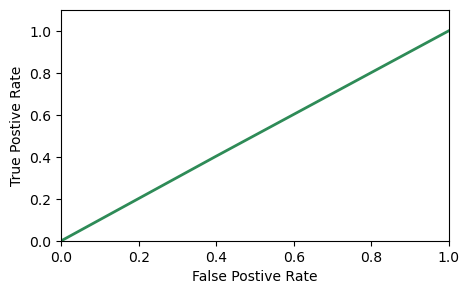

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 求出ROC曲线的x轴和y轴
fpr, tpr, thresholds = roc_curve(test_y,predict_y)
plt.figure(figsize=(5,3))
plt.xlim(0,1)      # 设定x轴的范围
plt.ylim(0.0,1.1)  # 设定y轴的范围
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.plot(fpr,tpr,linewidth=2, linestyle="-",color='seagreen')
plt.savefig('ROC.png')
plt.show()

<font color='red'>以下代码修改自左老师代码</font>

In [20]:
import pandas as pd

data = pd.read_excel('商务与经济统计数据.xlsx',sheet_name='满意度')    # 读取数据
df = pd.concat((data[data.满意度.values=='非常满意'],data[data.满意度.values=='非常不满意']),axis=0)
df

,店铺评级,商品销量,售后服务评分,质保年限,是否折扣,是否包邮,商品质量,客服服务,满意度
8,1,2639,1,5,0,1,良,1,非常满意
17,3,7840,4,5,1,0,良,1,非常满意
22,4,6287,2,1,0,0,中,5,非常满意
34,5,8662,4,4,1,0,中,4,非常满意
37,1,979,2,2,0,0,优,4,非常满意
...,...,...,...,...,...,...,...,...,...
971,2,5512,1,3,0,1,良,5,非常不满意
980,4,868,4,5,1,0,良,4,非常不满意
992,2,6478,2,2,0,0,劣,4,非常不满意
993,4,4929,2,4,0,1,中,3,非常不满意


In [21]:
feature_cols = ['店铺评级', '商品销量', '售后服务评分', '质保年限', '是否折扣', '是否包邮', '商品质量', '客服服务']
target_col = '满意度'
df.dropna(subset=feature_cols+[target_col], inplace=True)

In [22]:
# separate the feature (X) and target data (Y)
X = df[feature_cols].values
Y = df[target_col].values
print('Shape of X:', X.shape)
print('Size of Y:', Y.size)

Shape of X: (375, 8)
Size of Y: 375


In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']       # 显示中文

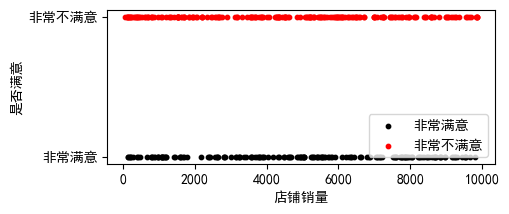

In [24]:
X_sold = X[:,1]

fig, ax = plt.subplots(figsize=[5, 2])

sca_0 = ax.scatter(x=X_sold[Y=='非常满意'], y=Y[Y=='非常满意'], color='k', s=10, label='非常满意')
sca_1 = ax.scatter(x=X_sold[Y=='非常不满意'], y=Y[Y=='非常不满意'], color='r', s=10, label='非常不满意')

ytick = ax.set_yticks([0, 1])

xlab = ax.set_xlabel('店铺销量')
ylab = ax.set_ylabel('是否满意')
# legend
leg = ax.legend(loc=4)

In [25]:
from sklearn.preprocessing import LabelEncoder    # Label编码

encoder=LabelEncoder()
df['满意度']=encoder.fit_transform(df['满意度'])

In [26]:
dummy_feature = df.iloc[:,6]
df = df.drop(columns = '商品质量')

dummies = pd.get_dummies(dummy_feature)[['中','良','优']]   # 哑变量
df = pd.concat((dummies,df),axis=1)
df

,中,良,优,店铺评级,商品销量,售后服务评分,质保年限,是否折扣,是否包邮,客服服务,满意度
8,0,1,0,1,2639,1,5,0,1,1,1
17,0,1,0,3,7840,4,5,1,0,1,1
22,1,0,0,4,6287,2,1,0,0,5,1
34,1,0,0,5,8662,4,4,1,0,4,1
37,0,0,1,1,979,2,2,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...
971,0,1,0,2,5512,1,3,0,1,5,0
980,0,1,0,4,868,4,5,1,0,4,0
992,0,0,0,2,6478,2,2,0,0,4,0
993,1,0,0,4,4929,2,4,0,1,3,0


In [27]:
from sklearn import model_selection

train_x, test_x, train_y, test_y = model_selection.train_test_split(df.iloc[:,:-1],
                                                                    df.iloc[:,-1], 
                                                                    test_size=0.33,
                                                                    random_state=42)
print('Training set:')
print('X: ', train_x.shape, 'Y:', train_y.size)
print('Test set:')
print('X: ', test_x.shape, 'Y:', test_y.size)

Training set:
X:  (251, 10) Y: 251
Test set:
X:  (124, 10) Y: 124


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)
predict_y = knn.predict(test_x)

D:\Anaconda\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [29]:
num_correct = (predict_y == test_y).sum()
ptcg_correct = (num_correct / test_y.size) * 100
print('The # of correct predictions:', num_correct)
print('The prediction accuracy: %.2f%%'%ptcg_correct)

The # of correct predictions: 56
The prediction accuracy: 45.16%


## 11.3 决策树和其属性选择

<p>决策树（decision tree）是一种基本的分类与回归方法。本章主要讨论用于分类的决策树。决策树模型呈树形结构，在分类问题中，表示基于特征对实例进行分类的过程。它可以认为是if-then规则的集合，也可以认为是定义在特征空间与类空间上的条件概率分布。其主要优点是模型具有可读性，分类速度快。学习时，利用训练数据，根据损失函数最小化的原则建立决策树模型。预测时，对新的数据，利用决策树模型进行分类。决策树学习通常包括3个步骤：特征选择、决策树的生成和决策树的修剪。这些决策树学习的思想主要来源于由Quinlan在1986年提出的ID3算法和1993年提出的C4.5算法，以及由Breiman等人在1984年提出的CART算法。</p>

**模型**

分类决策树模型是一种描述对实例进行分类的树形结构。决策树由结点（node）和有向边（directed edge）组成。结点有两种类型：内部结点（internal node）和叶结点（leaf node）。内部结点表示一个特征或属性，叶结点表示一个类。

用决策树分类，从根结点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子结点；这时，每一个子结点对应着该特征的一个取值。如此递归地对实例进行测试并分配，直至达到叶结点。最后将实例分到叶结点的类中。

图11.3-1是一个决策树的示意图。图中圆和方框分别表示内部结点和叶结点。

![决策树模型.png](决策树模型.png)
<center>图11.3-1 决策树模型</center>

**决策树与if-then规则**

可以将决策树看成一个if-then规则的集合。将决策树转换成if-then规则的过程是这样的：由决策树的根结点到叶结点的每一条路径构建一条规则；路径上内部结点的特征对应着规则的条件，而叶结点的类对应着规则的结论。决策树的路径或其对应的if-then规则集合具有一个重要的性质：互斥并且完备。这就是说，每一个实例都被一条路径或一条规则所覆盖，而且只被一条路径或一条规则所覆盖。这里所谓覆盖是指实例的特征与路径上的特征一致或实例满足规则的条件。

**决策树与条件概率分布**

决策树还表示给定特征条件下类的条件概率分布。这一条件概率分布定义在特征空间的一个划分（partition）上。将特征空间划分为互不相交的单元（cell）或区域（region），并在每个单元定义一个类的概率分布就构成了一个条件概率分布。决策树的一条路径对应于划分中的一个单元。决策树所表示的条件概率分布由各个单元给定条件下类的条件概率分布组成。假设$X$为表示特征的随机变量，Y为表示类的随机变量，那么这个条件概率分布可以表示为$P(Y|X)$。$X$取值于给定划分下单元的集合，$Y$取值于类的集合。各叶结点（单元）上的条件概率往往偏向某一个类，即属于某一类的概率较大。决策树分类时将该结点的实例强行分到条件概率大的那一类去。

图11.3-2（a）示意地表示了特征空间的一个划分。图中的大正方形表示特征空间。这个大正方形被若干个小矩形分割，每个小矩形表示一个单元。特征空间划分上的单元构成了一个集合，$X$取值为单元的集合。为简单起见，假设只有两类：正类和负类，即$Y$取值为$+1$和$–1$。小矩形中的数字表示单元的类。图11.3-2（b）示意地表示特征空间划分确定时，特征（单元）给定条件下类的条件概率分布。图11.3-2（b）中条件概率分布对应于图11.3-2（a）的划分。当某个单元c的条件概率满足$P(Y=+1|X=c)>0.5$时，则认为这个单元属于正类，即落在这个单元的实例都被视为正例。图11.3-2（c）为对应于图11.3-2（b）中条件概率分布的决策树。

![决策树对应于条件概率分布.png](决策树对应于条件概率分布.png)
<center>图11.3-2 决策树对应于条件概率分布</center>

<font color='red'>来自[3]统计学习方法<font>

决策树(decision tree) 是一类常见的机器学习方法.以二分类任务为例，我们希望从给定训练数据集学得一个模型用以对新示例进行分类，这个把样本分类的任务，可看作对"当前样本属于正类吗?"这个问题的"决策"或"判定"过程.顾名思义，决策树是基于树结构来进行决策的，这恰是人类在面临决
策问题时一种很自然的处理机制.例如，我们要对"这是好瓜吗?"这样的问题进行决策时，通常会进行一系列的判断或"子决策"我们先看"它是什么颜色?"，如果是"青绿色"，则我们再看"它的根蒂是什么形态?"，如果是"蜷缩"，我们再判断"它敲起来是什么声音?"，最后，我们得出最终决策：这是个好瓜.
![西瓜问题的一棵决策树.png](西瓜问题的一棵决策树.png)
<center>图11.3-3 西瓜问题的一棵决策树</center>

显然，决策过程的最终结论对应了我们所希望的判定结果，例如"是"或"不是"好瓜;决策过程中提出的每个判定问题都是对某个属性的"测试"，例如"色泽=?" "根蒂=?";每个测试的结果或是导出最终结论，或是导出进一步的判定问题，其考虑范国是在上次决策结果的限定范围之内，例如若在"色泽=青绿"之后再判"根蒂=?"，则仅在考虑青绿色瓜的根蒂.

一般的，一棵决策树包含一个根结点、若干个内部结点和若干个叶结点；叶结点对应于决策结果?其他每个结点则对应于一个属性测试；每个结点包含的样本集合根据属性测试的结果被划分到子结点中;根结点包含样本全集.从根结点到每个叶结点的路径对应了一个判定测试序列.决策树学习的目的是为了产生一棵泛化能力强，即处理未见示例能力强的决策树，其基本流程遵循简单且直观的"分而治之" (divide-and-conquer) 策略.


<font color='red'>来自[5]机器学习<font>

**决策树学习**

假设给定训练数据集
$$
D=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}
$$

其中，$x_{i}=(x_{i}^{(1)},x_{i}^{(2)},\cdots,x_{i}^{(n)})^{\mathrm{T}}$为输入实例（特征向量），n为特征个数，$y_i\in\{1,2,…,K\}$为类标记，$i=1,2,…,N$，N为样本容量。决策树学习的目标是根据给定的训练数据集构建一个决策树模型，使它能够对实例进行正确的分类。

决策树学习本质上是从训练数据集中归纳出一组分类规则。与训练数据集不相矛盾的决策树（即能对训练数据进行正确分类的决策树）可能有多个，也可能一个都没有。我们需要的是一个与训练数据矛盾较小的决策树，同时具有很好的泛化能力。从另一个角度看，决策树学习是由训练数据集估计条件概率模型。基于特征空间划分的类的条件概率模型有无穷多个。我们选择的条件概率模型应该不仅对训练数据有很好的拟合，而且对未知数据有很好的预测。

决策树学习用损失函数表示这一目标。如下所述，决策树学习的损失函数通常是正则化的极大似然函数。决策树学习的策略是以损失函数为目标函数的最小化。

当损失函数确定以后，学习问题就变为在损失函数意义下选择最优决策树的问题。因为从所有可能的决策树中选取最优决策树是NP完全问题，所以现实中决策树学习算法通常采用启发式方法，近似求解这一最优化问题。这样得到的决策树是次最优（sub-optimal）的。

决策树学习的算法通常是一个递归地选择最优特征，并根据该特征对训练数据进行分割，使得对各个子数据集有一个最好的分类的过程。这一过程对应着对特征空间的划分，也对应着决策树的构建。开始，构建根结点，将所有训练数据都放在根结点。选择一个最优特征，按照这一特征将训练数据集分割成子集，使得各个子集有一个在当前条件下最好的分类。如果这些子集已经能够被基本正确分类，那么构建叶结点，并将这些子集分到所对应的叶结点中去；如果还有子集不能被基本正确分类，那么就对这些子集选择新的最优特征，继续对其进行分割，构建相应的结点。如此递归地进行下去，直至所有训练数据子集被基本正确分类，或者没有合适的特征为止。最后每个子集都被分到叶结点上，即都有了明确的类。这就生成了一棵决策树。

以上方法生成的决策树可能对训练数据有很好的分类能力，但对未知的测试数据却未必有很好的分类能力，即可能发生过拟合现象。我们需要对已生成的树自下而上进行剪枝，将树变得更简单，从而使它具有更好的泛化能力。具体地，就是去掉过于细分的叶结点，使其回退到父结点，甚至更高的结点，然后将父结点或更高的结点改为新的叶结点。

如果特征数量很多，也可以在决策树学习开始的时候，对特征进行选择，只留下对训练数据有足够分类能力的特征。

可以看出，决策树学习算法包含特征选择、决策树的生成与决策树的剪枝过程。由于决策树表示一个条件概率分布，所以深浅不同的决策树对应着不同复杂度的概率模型。决策树的生成对应于模型的局部选择，决策树的剪枝对应于模型的全局选择。决策树的生成只考虑局部最优，相对地，决策树的剪枝则考虑全局最优。

决策树学习常用的算法有ID3、C4.5与CART，下面结合这些算法分别叙述决策树学习的特征选择、决策树的生成和剪枝过程。

<font color='red'>来自[3]统计学习方法<font>

![决策树学习基本算法.png](决策树学习基本算法.png)
<center>图11.3-4 决策树学习基本算法</center>

显然，决策树的生成是一个递归过程.在决策树基本算法中，有三种情形会导致递归返回: (1) 当前结点包含的样本全属于同一类别，无需划分; (2) 当前属性集为空，或是所有样本在所有属性上取值相同，无法划分; (3) 当前结点包含的样本集合为空，不能划分.

在第(2)种情形下，我们把当前结点标记为叶结点，井将其类别设定为该结点所含样本最多的类别;在第(3)种情形下，同样把当前结点标记为叶结点，但将其类别设定为其父结点所含样本最多的类别.注意这两种情形的处理实质不同:情形(2)是在利用当前结点的后验分布，而情形(3)则是把父结点的样本分布作为当前结点的先验分布.

决策树学习的关键是第8行，即如何选择最优划分属性一般而言，随着划分过程不断进行，我们希望决策树的分支结点所包含的样本尽可能属于同一类别，即结点的"纯度" (purity) 越来越高.

<font color='red'>来自[5]机器学习</font>

特征选择在于选取对训练数据具有分类能力的特征。这样可以提高决策树学习的效率。如果利用一个特征进行分类的结果与随机分类的结果没有很大差别，则称这个特征是没有分类能力的。经验上扔掉这样的特征对决策树学习的精度影响不大。通常特征选择的准则是信息增益或信息增益比。

<font color='red'>来自[3]统计学习方法<font>

### 11.3.1 使用熵进行属性选择

#### （1）熵与条件熵

在信息论与概率统计中，熵（entropy）是表示随机变量不确定性的度量。设$X$是一个取有限个值的离散随机变量，其概率分布为
$$
\begin{array}{c c}{P(X=x_{i})=p_{i},}&{i=1,2,\cdots,n}\\ \end{array}
$$

则随机变量$X$的熵定义为
$$
H(X)=-\sum_{i=1}^n p_i\log p_i
$$
在式中，若$p_i=0$，则定义$0log0=0$。通常，式中的对数以2为底或以e为底（自然对数），这时熵的单位分别称作比特（bit）或纳特（nat）。由定义可知，熵只依赖于$X$的分布，而与$X$的取值无关，所以也可将$X$的熵记作$H(p)$，即
$$
H(p)=-\sum_{i=1}^n p_i\log p_i
$$

熵越大，随机变量的不确定性就越大。从定义可验证
$$
0\leqslant H(p)\leqslant\log n
$$

当随机变量只取两个值，例如1，0时，即$X$的分布为
$$
P(X=1)=p,\quad P(X=0)=1-p,\quad0\leqslant p\leqslant1
$$

熵为
$$
H(p)=-p\log_2p-(1-p)\log_2(1-p)
$$

这时，熵$H(p)$随概率$p$变化的曲线如图11.3-5所示（单位为比特）。

![分布为伯努利分布时熵与概率的关系](分布为伯努利分布时熵与概率的关系.png)
<center>图11.3-5 分布为伯努利分布时熵与概率的关系</center>


当$p=0$或$p=1$时$H(p)=0$，随机变量完全没有不确定性。当$p=0.5$时，$H(p)=1$，熵取值最大，随机变量不确定性最大。

设有随机变量$(X,Y)$，其联合概率分布为
$$
P(X=x_i,Y=y_j)=p_{ij},\quad i=1,2,\cdots,n;\quad j=1,2,\cdots,m
$$

条件熵$H(Y|X)$表示在已知随机变量$X$的条件下随机变量$Y$的不确定性。随机变量$X$给定的条件下随机变量$Y$的条件熵（conditional entropy）$H(Y|X)$，定义为$X$给定条件下$Y$的条件概率分布的熵对$X$的数学期望
$$
H(Y|X)=\sum\limits_{i=1}^n p_i H(Y|X=x_i)
$$

这里，$p_i=P(X=x_i)$，$i=1,2,…,n$。

当熵和条件熵中的概率由数据估计（特别是极大似然估计）得到时，所对应的熵与条件熵分别称为经验熵（empirical entropy）和经验条件熵（empirical conditional entropy）。此时，如果有0概率，令$0log0=0$。

信息增益（information gain）表示得知特征$X$的信息而使得类$Y$的信息的不确定性减少的程度。

<font color='red'>来自[3]统计学习方法<font>

#### （2）信息增益

定义5.2（信息增益） 特征A对训练数据集D的信息增益$g(D,A)$，定义为集合D的经验熵$H(D)$与特征A给定条件下D的经验条件熵$H(D|A)$差，即
$$
g(D,A)=H(D)-H(D|A)
$$

一般地，熵$H(Y)$与条件熵$H(Y|X)$之差称为互信息（mutual information）。决策树学习中的信息增益等价于训练数据集中类与特征的互信息。

决策树学习应用信息增益准则选择特征。给定训练数据集$D$和特征$A$，经验熵$H(D)$表示对数据集$D$进行分类的不确定性。而经验条件熵$H(D|A)$表示在特征$A$给定的条件下对数据集$D$进行分类的不确定性。那么它们的差，即信息增益，就表示由于特征$A$而使得对数据集$D$的分类的不确定性减少的程度。显然，对于数据集$D$而言，信息增益依赖于特征，不同的特征往往具有不同的信息增益。信息增益大的特征具有更强的分类能力。

根据信息增益准则的特征选择方法是：对训练数据集（或子集）$D$，计算其每个特征的信息增益，并比较它们的大小，选择信息增益最大的特征。

设训练数据集为$D$，$|D|$表示其样本容量，即样本个数。设有K个类$C_k$，$\text{k=}\sum\limits_{k=1}^K|C_k|=|D|\text{1,2,...,K}$，$|C_k|$为属于类$C_k$的样本个数，。设特征A有n个不同的取值$\{\mathtt{a}_{1},\mathtt{a}_{2},...,\mathtt{a}_{n}\}\sum_{i=1}^{n}|D_{i}|=|D|$，根据特征A的取值将D划分为n个子集$D_1,D_2,…,D_n$，|$D_i$|为Di的样本个数，。记子集$D_i$中属于类$C_k$的样本的集合为$D_{ik}$，即$D_{ik}=D_{j}\cap C_{k}$，|$D_{ik}$|为$D_{ik}$的样本个数。于是信息增益的算法如下。

算法5.1（信息增益的算法）

输入：训练数据集$D$和特征$A$；

输出：特征$A$对训练数据集$D$的信息增益$g(D,A)$。

（1）计算数据集$D$的经验熵$H(D)$
$$
H(D)=-\sum\limits_{k=1}^K\dfrac{|C_k|}{|D|}\log_2\dfrac{|C_k|}{|D|}
$$

（2）计算特征$A$对数据集$D$的经验条件熵$H(D|A)$
$$
H(D|A)=\sum_{i=1}^{n}\dfrac{|D_i|}{|D|}H(D_i)=-\sum_{i=1}^{n}\dfrac{|D_i|}{|D|}\sum_{k=1}^{K}\dfrac{|D_{ik}|}{|D_i|}\log_2\dfrac{|D_{ik}|}{|D_i|}
$$

（3）计算信息增益
$$
g(D,A)=H(D)-H(D|A)
$$

<font color='red'>来自[3]统计学习方法</font>

"信息熵" (information entropy)是度量样本集合纯度最常用的一种指标.假定当前样本集合$D$中第$k$类样本所占的比例为$P_k(k = 1, 2,. . . , IYI)$ ，则$D$的信息熵定义为
$$
\operatorname{Ent}(D)=-\sum_{k=1}^{|\mathcal{Y}|}p_k\log_2p_k
$$

$\operatorname{Ent}(D)$的值越小，则$D$的纯度越高.

假定离散属性$α$有V个可能的取值$\{a^1,a^2,...,a^V\}$，若使用$α$来对样本集$D$进行划分，则会产生V个分支结点，其中第v个分支结点包含了$D$中所有在属性$α$上取值为$α^v$的样本，记为$D^v$. 我们可根据信息熵定义式（上式）计算出$D^v$的信息熵，再考虑到不同的分支结点所包含的样本数不同，给分支结点赋予权重$|D^v|/|D|$ ，即样本数越多的分支结点的影响越大，于是可计算出用属性$α$对样本集$D$进行划分所获得的"信息增益" (information gain)
$$
\mathrm{Gain}(D,a)=\mathrm{Ent}(D)-\sum\limits_{v=1}^V\dfrac{|D^v|}{|D|}\mathrm{Ent}(D^v)
$$

一般而言，信息增益越大，则意味着使用属性$α$来进行划分所获得的"纯度提升"越大.因此，我们可用信息增益来进行决策树的划分属性选择，即在图4.2算法第8行选择属性$a_*=\underset{a\in A}{\arg\max}\operatorname{Gain}(D,a)$.著名的ID3决策树学习算法就是以信息增益为准则来选择划分属性.

以表11.3-1中的西瓜数据集2.0为例，该数据集包含17个训练样例，用以学习一棵能预测设剖开的是不是好瓜的决策树.显然， $|\mathcal{Y}|=2$. 在决策树学习开始时，根结点包含$D$中的所有样例，其中正例占$p_1=\frac{8}{17}$，反例占$p_2=\frac{9}{17}$.于是，根据熵的定义式（上上式）可计算出根结点的信息熵为
$$
\operatorname{Ent}(D)=-\sum_{k=1}^2p_k\log_2p_k=-\left(\dfrac8{17}\log_2\dfrac8{17}+\dfrac9{17}\log_2\dfrac9{17}\right)=0.998
$$

![西瓜数据集2.png](西瓜数据集2.png)
<center>表11.3-1 西瓜数据集2.0</center>

然后，我们要计算出当前属性集合{色泽，根蒂，敲声，纹理，脐部，触感}中每个属性的信息增益.以属性"色泽"为例，它有3个可能的取值: {青绿，乌黑，浅自}.若使用该属性对$D$进行划分，则可得到3个子集，分别记为: $D^1$(色泽=青绿)，$D^2$(色泽=乌黑)，$D^3$(色泽=浅白).

子集$D^1$包含编号为{1, 4, 6, 10, 13, 17} 的6个样例，其中正例占$p_1=\frac{3}{6}$，反例占$p_2=\frac{3}{6}$；$D^2$包含编号为{2, 3, 7, 8, 9, 15}的6个样例，其中正、反例分别占$p_1=\frac{4}{6}$， $p_2=\frac{2}{6}$，$D^3$包含编号为{5, 11, 12, 14, 16} 的5个样例，其中正、反例分别占$p_1=\frac{1}{5}$，$p_2=\frac{4}{5}$.根据熵的定义式（上上式）可计算出用"色泽"划分之后所获得的3个分支结点的信息熵为

$$
\begin{array}{r}\mathrm{Ent}(D^1)=-\left(\frac{3}{6}\log_2\frac{3}{6}+\frac{3}{6}\log_2\frac{3}{6}\right)=1.000,\\
\mathrm{Ent}(D^2)=-\left(\frac{4}{6}\log_2\frac{4}{6}+\frac{2}{6}\log_2\frac{2}{6}\right)=0.918,\\
\mathrm{Ent}(D^3)=-\left(\frac{1}{5}\log_2\frac{1}{5}+\frac{4}{5}\log_2\frac{4}{5}\right)=0.722,\end{array}
$$

于是，根据信息增益计算式（上式）可计算出属性"色泽"的信息增益为
$$
\begin{aligned}
\operatorname{Gain}(D, \text { 色泽 }) & =\operatorname{Ent}(D)-\sum_{v=1}^3 \frac{\left|D^v\right|}{|D|} \operatorname{Ent}\left(D^v\right) \\
& =0.998-\left(\frac{6}{17} \times 1.000+\frac{6}{17} \times 0.918+\frac{5}{17} \times 0.722\right) \\
& =0.109 .
\end{aligned}
$$

类似的，我们可计算出其他属性的信息增益：
$$
\begin{aligned}
& \operatorname{Gain}(D, \text { 根蒂 })=0.143 ; \quad \operatorname{Gain}(D, \text { 敲声 })=0.141 ; \\
& \operatorname{Gain}(D, \text { 纹理 })=0.381 ; \quad \operatorname{Gain}(D, \text { 脐部 })=0.289 ; \\
& \operatorname{Gain}(D, \text { 触感 })=0.006 .
\end{aligned}
$$

显然，属性"纹理"的信息增益最大?于是它被选为划分属性.图11.3-6给出了基于"纹理"对根结点进行划分的结果，各分支结点所包含的样例子集显示在结点中.
![基于纹理属性对根节点进行划分.png](基于纹理属性对根节点进行划分.png)
<center>图11.3-6 基于纹理属性对根节点进行划分</center>

"根蒂"、"脐部"、"触感"3个属性均取得了最大的信息增益，可任选其中之一作为划分属性.类似的，对每个分支结点进行上述操作，最终得到的决策树如圈4.4 所示.
![在西瓜数据集2上基于信息增益生成的决策树.png](在西瓜数据集2上基于信息增益生成的决策树.png)
<center>图11.3-7 在西瓜数据集2上基于信息增益生成的决策树</center>

<font color='red'>来自[5]机器学习</font>

#### （3）基本方法

ID3算法的核心是在决策树各个结点上应用信息增益准则选择特征，递归地构建决策树。具体方法是：从根结点（root node）开始，对结点计算所有可能的特征的信息增益，选择信息增益最大的特征作为结点的特征，由该特征的不同取值建立子结点；再对子结点递归地调用以上方法，构建决策树；直到所有特征的信息增益均很小或没有特征可以选择为止。最后得到一棵决策树。ID3相当于用极大似然法进行概率模型的选择。

<font color='red'>来自[3]统计学习方法<font>

**（4）算法流程**

算法5.2（ID3算法）

输入：训练数据集$D$，特征集$A$阈值$ε$；

输出：决策树$T$。

（1）若$D$中所有实例属于同一类$C_k$，则$T$为单结点树，并将类$C_k$作为该结点的类标记，返回$T$；

（2）若$A=∅$，则$T$为单结点树，并将$D$中实例数最大的类$C_k$作为该结点的类标记，返回$T$；

（3）否则，按算法5.1计算$A$中各特征对$D$的信息增益，选择信息增益最大的特征$A_g$；

（4）如果$A_g$的信息增益小于阈值$ε$，则置$T$为单结点树，并将$D$中实例数最大的类$C_k$作为该结点的类标记，返回$T$；

（5）否则，对$A_g$的每一可能值$a_i$，依$A_g=a_i$将$D$分割为若干非空子集$D_i$，将$D_i$中实例数最大的类作为标记，构建子结点，由结点及其子结点构成树T，返回T；

（6）对第$i$个子结点，以$D_i$为训练集，以$A−{A_g}$为特征集，递归地调用步（1）~步（5），得到子树$T_i$，返回$T_i$。

<font color='red'>来自[3]统计学习方法<font>

### 11.3.2 使用频率表进行属性选择

#### （1）信息增益比

以信息增益作为划分训练数据集的特征，存在偏向于选择取值较多的特征的问题。使用信息增益比（information gain ratio）可以对这一问题进行校正。这是特征选择的另一准则。

定义5.3（信息增益比） 特征A对训练数据集D的信息增益比$g_R(D,A)$定义为其信息增益$g(D,A)$与训练数据集$D$关于特征$A$的值的熵$H_A(D)$之比，即
$$
g_R(D,A)=\dfrac{g(D,A)}{H_A(D)}
$$

其中，$H_A(D)=-\sum\limits_{i=1}^n\dfrac{|D_i|}{|D|}\log_2\dfrac{|D_i|}{|D|}$，n是特征$A$取值的个数。

<font color='red'>来自[3]统计学习方法<font>

若把"编号"也作为一个候选划分属性，则根据式件均可计算出它的信息增益为0.998，远大于其他候选划分属性.这很容易理解"编号"将产生17 个分支，每个分支结点仅包含一个样本，这些分支结点的纯度己达最大.然而，这样的决策树显然不具有泛化能力，无法对新样本进行有效预测.

实际上，信息增益准则对可取值数目较多的属性有所偏好，为减少这种偏好可能带来的不利影响，著名的C4.5决策树算法不直接使用信息增益，而是使用"增益率" (gain ratio) 来选择最优划分属性. 增益率定义为
$$
\mathrm{Gain_ratio}(D,a)=\dfrac{\mathrm{Gain}(D,a)}{\mathrm{IV}(a)}
$$
其中，
$$
\mathrm{~V}(a)=-\sum_{v=1}^{V}\dfrac{|D^v|}{|D|}\log_2\dfrac{|D^v|}{|D|}
$$

称为属性$α$的"固有值" (intrinsic value).属性$α$的可能取值数目越多(即$V$越大)，则$IV(α)$的值通常会越大.例如，对表4.1的西
瓜数据集2.0，有$IV(触感)=0.874(V = 2)$, $IV(色泽) =1.580(V = 3)$,$IV(编号) = 4.088 (V = 17)$.

需注意的是，增益率准则对可取值数目较少的属性有所偏好，因此，C4.5算法并不是直接选择增益率最大的候选划分属性，而是使用了一个启发式:先从候选划分属性中找出信息增益高于平均水平的属性，再从中选择增益率最高的.

<font color='red'>来自[5]机器学习</font>

#### （2）算法流程

算法5.3（C4.5的生成算法）

输入：训练数据集$D$，特征集$A$阈值$ε$；

输出：决策树$T$。

（1）如果$D$中所有实例属于同一类$C_k$，则置$T$为单结点树，并将$C_k$作为该结点的类，返回$T$；

（2）如果$A=∅$，则置$T$为单结点树，并将$D$中实例数最大的类$C_k$作为该结点的类，返回$T$；

（3）否则，按式（5.10）计算$A$中各特征对$D$的信息增益比，选择信息增益比最大的特征$A_g$；

（4）如果$A_g$的信息增益比小于阈值$ε$，则置$T$为单结点树，并将$D$中实例数最大的类$C_k$作为该结点的类，返回$T$；

（5）否则，对$A_g$的每一可能值$a_i$，依$A_g=a_i$将$D$分割为子集若干非空$D_i$，将$D_i$中实例数最大的类作为标记，构建子结点，由结点及其子结点构成树$T$，返回$T$；

（6）对结点$i$，以$D_i$为训练集，以$A-\{Ag\}$为特征集，递归地调用步（1）~步（5），得到子树$T_i$，返回$T_i$。

<font color='red'>来自[3]统计学习方法<font>

### 11.3.3 避免决策树的过度拟合

#### （1）决策树的剪枝

决策树生成算法递归地产生决策树，直到不能继续下去为止。这样产生的树往往对训练数据的分类很准确，但对未知的测试数据的分类却没有那么准确，即出现过拟合现象。过拟合的原因在于学习时过多地考虑如何提高对训练数据的正确分类，从而构建出过于复杂的决策树。解决这个问题的办法是考虑决策树的复杂度，对已生成的决策树进行简化。在决策树学习中将已生成的树进行简化的过程称为剪枝（pruning）。具体地，剪枝从已生成的树上裁掉一些子树或叶结点，并将其根结点或父结点作为新的叶结点，从而简化分类树模型。

本节介绍一种简单的决策树学习的剪枝算法。

决策树的剪枝往往通过极小化决策树整体的损失函数（loss function）或代价函数（cost function）来实现。设树$T$的叶结点个数为$|T|$，$t$是树$T$的叶结点，该叶结点有$N_t$个样本点，其中$k$类的样本点有$N_{tk}$个，$k=1,2,…,K$，$H_t(T)$为叶结点$t$上的经验熵，$a \geq 0$为参数，则决策树学习的损失函数可以定义为
$$
C_\alpha(T)=\sum\limits_{t=1}^{|T|}N_tH_t(T)+\alpha|T|
$$
其中经验熵为
$$
H_t(T)=-\sum_k\dfrac{N_{tk}}{N_t}\log\dfrac{N_{tk}}{N_t}
$$
在损失函数中，将损失函数（上上式）右端的第1项记作
$$
C(T)=\sum_{t=1}^{|T|}N_tH_t(T)=-\sum_{t=1}^{|T|}\sum_{k=1}^{K}N_{tk}\log\dfrac{N_{tk}}{N_t}
$$
这时有
$$
C_{\alpha}(T)=C(T)+\alpha|T|
$$
上式中，$C(T)$表示模型对训练数据的预测误差，即模型与训练数据的拟合程度，$|T|$表示模型复杂度，参数$α≥0$控制两者之间的影响。较大的$α$促使选择较简单的模型（树），较小的$α$促使选择较复杂的模型（树）。$α=0$意味着只考虑模型与训练数据的拟合程度，不考虑模型的复杂度。

剪枝，就是当$α$确定时，选择损失函数最小的模型，即损失函数最小的子树。当$α$值确定时，子树越大，往往与训练数据的拟合越好，但是模型的复杂度就越高；相反，子树越小，模型的复杂度就越低，但是往往与训练数据的拟合不好。损失函数正好表示了对两者的平衡。

可以看出，决策树生成只考虑了通过提高信息增益（或信息增益比）对训练数据进行更好的拟合。而决策树剪枝通过优化损失函数还考虑了减小模型复杂度。决策树生成学习局部的模型，而决策树剪枝学习整体的模型。

损失函数或上式定义的损失函数的极小化等价于正则化的极大似然估计。所以，利用损失函数最小原则进行剪枝就是用正则化的极大似然估计进行模型选择。

图5.6是决策树剪枝过程的示意图。下面介绍剪枝算法。

<font color='red'>来自[3]统计学习方法</font>
    
剪枝(pruning)是决策树学习算法对付"过拟合"的主要手段.在决策树学习中，为了尽可能正确分类训练样本，结点划分过程将不断重复，有时会造成决策树分支过多，这时就可能因训练样本学得"太好"了，以致于把训练集自身的一些特点当作所有数据都具有的一般性质而导致过拟合.因此，可通过主动去掉一些分支来降低过拟合的风险.决策树剪枝的基本策略有"预剪枝" (prepruning)和"后剪枝"(post"pruning). 预剪枝是指在决策树生成过程中，对每个结点在划分前先进行估计，若当前结点的划分不能带来决策树泛化性能提升，则停止划分并将当前结点标记为叶结点;后剪枝则是先从训练集生成一棵完整的决策树，然后自底向上地对非叶结点进行考察，若将该结点对应的子树替换为叶结点能带来决策树泛化性能提升，则将该子树替换为叶结点.

如何判断决策树泛化性能是否提升呢?这可使用性能评估方法.本节假定采用留出法，即预留一部分数据用作"验证集"以进行性能评估.例如对表4.1的西瓜数据集2.0，我们将其随机划分为两部分，如表4.2所示，编号为$\{1, 2, 3, 6, 7, 10, 14, 15, 16, 17\}$的样例组成训练集，编号为$\{4, 5, 8, 9, 11, 12, 13\}$的样例组成验证集.

![西瓜数据集划分出来的训练集与验证集.png](西瓜数据集划分出来的训练集与验证集.png)
<center>表11.3-2 西瓜数据集划分出来的训练集与验证集</center>
假定我们采用信息增益准则来进行划分属性选择，则从表11.3-2的训练集将会生成一棵如图11.3-8所示的决策树.为便于讨论，我们对图中的部分结点做了编号.

**预剪枝**

我们先讨论预剪枝.基于信息增益准则，我们会选取属性"脐部"来对训练集进行划分，并产生3个分支，如图11.3-9所示.然而，是否应该进行这个划分呢?预剪枝要对划分前后的泛化性能进行估计.

在划分之前，所有样例集中在根结点.若不进行划分，则根据图11.3-4所示算法第6行，该结点将被标记为叶结点，其类别标记为训练样例数最多的类别，假设我们将这个叶结点标记为"好瓜"，用表11.3-2的验证集对这个单结点决策树进行评估，则编号为$\{4, 5, 8\}$的样例被分类正确，另外4个样例分类错误，于是，验证集精度为$\frac{3}{7}\times 100\% = 42.9\%$

![未剪枝决策树.png](未剪枝决策树.png)
<center>图11.3-8 未剪枝决策树</center>

![预剪枝决策树.png](预剪枝决策树.png)
<center>图11.3-9 预剪枝决策树</center>
在用属性"脐部"划分之后，图11.3-9中的结点②、③、④分别包含编号为$\{1, 2, 3, 14\}$、$\{6, 7, 15, 17\}$ 、$\{10, 16\}$的训练样例，因此这3个结点分别被标记为叶结点"好瓜"、"好瓜"、"坏瓜". 此时，验证集中编号为$\{4, 5, 8, 1l,  12\}$ 的样例被分类正确，验证集精度为$\frac{5}{7}\times 100\% = 71.4\% > 42.9\%$. 于是，用"脐部"进行划分得以确定.

然后，决策树算法应该对结点②进行划分，基于信息增益准则将挑选出划分属性"色泽"然而，在使用"色泽"划分后，编号为$\{5\}$ 的验证集样本分类结果会由正确转为错误，使得验证集精度下降为57.1%. 于是，预剪枝策略将禁止结点②被划分.

对结点③，最优划分属性为"根蒂"，划分后验证集精度仍为71.4%. 这个划分不能提升验证集精度，于是，预剪枝策略禁止结点③被划分.

对结点④，其所含训练样例己属于同一类，不再进行划分.

于是，基于预剪枝策略从表11.3-1数据所生成的决策树如图11.3-10所示，其验证集精度为71.4%. 这是一棵仅有一层划分的决策树，亦称"决策树桩"(decision stump).

对比图11.3-9和图11.3-8可看出，于预页剪枝使得决策树的很多分支都没有"展开”，这不仅降低了过拟合的风险，还显著减少了决策树的训练时间开销和测试时间开销.但另一方面，有些分支的当前划分虽不能提升泛化性能、甚至可能导致泛化性能暂时下降?但在其基础上进行的后续划分却有可能导致性能显著提高;预剪枝基于"贪心"本质禁止这些分支展开，给预剪枝决策树带来了欠拟含的风险.

**后剪枝**

后剪枝先从训练集生成一棵完整决策树，例如基于表11.3-1的数据我们得到如图11.3-8所示的决策树.易知，该决策树的验证集精度为42.9%.

后剪枝首先考察图11.3-8中的结点⑥.若将其领衔的分支剪除，则相当于把⑤替换为叶结点.替换后的叶结点包含编号为$\{7, 15\}$的训练样本，于是，该叶结点的类别标记为"好瓜"，此时决策树的验证集精度提高至57.1%. 于是，后剪枝策略决定剪枝，如图11.3-11所示.

然后考察结点⑤，若将其领衔的子树替换为叶结点，则替换后的叶结点包含编号为$\{6, 7, 15\}$ 的训练样例，叶结点类别标记为"好瓜'，此时决策树验证集精度仍为57.1%. 于是，可以不进行剪枝.

对结点②，若将其领衔的子树替换为叶结点，则替换后的叶结点包含编号为$\{1, 2, 3, 14\}$ 的训练样例，叶结点标记为"好瓜"此时决策树的验证集精度提高至71. 4%. 于是，后剪枝策略决定剪枝.

对结点③和①，若将其领衔的子树替换为叶结点，则所得决策树的验证集精度分别为71.4% 与42.9%，均未得到提高.于是它们被保留.

![后剪枝决策树.png](后剪枝决策树.png)
<center>图11.3-10 后剪枝决策树</center>
最终，基于后剪枝策略从表11.3-2数据所生成的决策树如图11.3-10所示，其验证集精度为71.4%.

对比图11.3-10和图11.3-9可看出，后剪枝决策树通常比预剪枝决策树保留了更多的分支. 一般情形下，后剪枝决策树的欠拟合风险很小，泛化性能往往优于预剪枝决策树.但后剪枝过程是在生成完全决策树之后进行的，并且要白底向上地对树中的所有非叶结点进行逐一考察，因此其训练时间开销比未剪枝决策树和预剪枝决策树都要大得多.

<font color='red'>来自[5]机器学习</font>

#### （2）算法流程

算法5.4（树的剪枝算法）

输入：生成算法产生的整个树$T$，参数$α$；

输出：修剪后的子树$T_α$。

（1）计算每个结点的经验熵。

（2）递归地从树的叶结点向上回缩。

图5.6 决策树的剪枝设一组叶结点回缩到其父结点之前与之后的整体树分别为$T_B$与$T_A$，其对应的损失函数值分别是$C_α(T_B)$与$C_α(T_A)$，如果
$$
C_\alpha(T_A)\leqslant C_\alpha(T_B)
$$
则进行剪枝，即将父结点变为新的叶结点。

（3）返回（2），直至不能继续为止，得到损失函数最小的子树$T_α$。注意，式（5.15）只需考虑两个树的损失函数的差，其计算可以在局部进行。所以，决策树的剪枝算法可以由一种动态规划的算法实现。


<font color='red'>来自[3]统计学习方法<font>

**决策树代码示例**

<font color='red'>以下代码修改自Python商业数据分析（与数据挖掘课程代码相近）</font>

In [30]:
from sklearn import tree

decision_tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy')     # 配置决策树模型
decision_tree_clf.fit(train_x,train_y)                                     # 训练模型

accuracy = decision_tree_clf.score(test_x,test_y)
print('Accuracy:',accuracy)
print('Predict:',list(decision_tree_clf.predict(test_x[0:10])))            # 利用模型预测前 10 个样本
print('Actual:',list(test_y[0:10]))                                        # 前 10 个样本的真实值

Accuracy: 0.47580645161290325
Predict: [0, 0, 0, 0, 1, 1, 0, 1, 1, 0]
Actual: [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]


<font color='red'>以下代码来自数据挖掘课程</font>

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

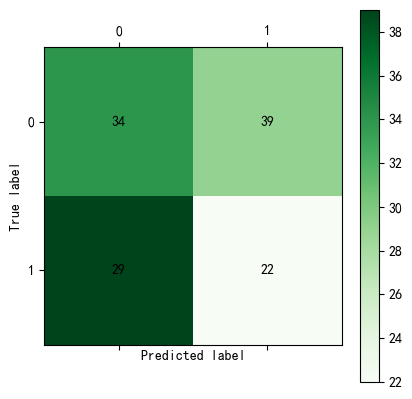

In [31]:
# 自行编写的混淆矩阵可视化函数
def cm_plot(y, yp):
    cm = confusion_matrix(y, yp) 
    plt.matshow(cm, cmap=plt.cm.Greens) 
    plt.colorbar() 
    for x in range(len(cm)): 
        for y in range(len(cm)):
            plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
    plt.ylabel('True label') 
    plt.xlabel('Predicted label') 
    return plt

cm_plot(test_y,predict_y)

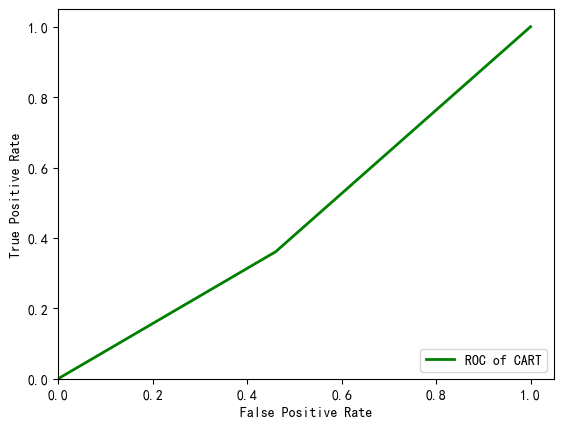

In [32]:
fpr, tpr, thresholds = roc_curve(test_y, predict_y, pos_label=1)
plt.plot(fpr, tpr, linewidth=2, label = 'ROC of CART', color = 'green') #作出ROC曲线
plt.xlabel('False Positive Rate') #坐标轴标签
plt.ylabel('True Positive Rate') #坐标轴标签
plt.ylim(0,1.05) #边界范围
plt.xlim(0,1.05) #边界范围
plt.legend(loc=4) #图例
plt.show() #显示作图结果